In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr')

# Add the root directory of this repository
sys.path.append('../..')

from utils import gen_covariance, gen_beta2, gen_data, get_cov_list
from utils import selection_accuracy

In [3]:
from postprocess import postprocess_dir 

In [4]:
from postprocess_utils import *

In [5]:
from matplotlib import colors

In [6]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


In [7]:
import pickle

In [8]:
with open('lasso_test.dat', 'rb') as f: 
    lasso = pickle.load(f)

In [9]:
# Main thing to test: All selection methods are giving reasonable results.
kappa = np.unique(lasso['kappa'].values)
sparsity = np.unique(lasso['sparsity'].values)
cov_params = unique_cov_params(lasso)

In [10]:
kappa

array([1, 2, 5])

In [11]:
sparsity

array([0.02      , 0.02644752, 0.03497357, 0.04624822, 0.06115754,
       0.08087327, 0.10694488, 0.14142136, 0.18701223, 0.2473005 ,
       0.32702428, 0.4324491 , 0.57186037, 0.7562145 , 1.        ])

In [12]:
len(cov_params)

2

/home/akumar/anaconda3/envs/nse/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


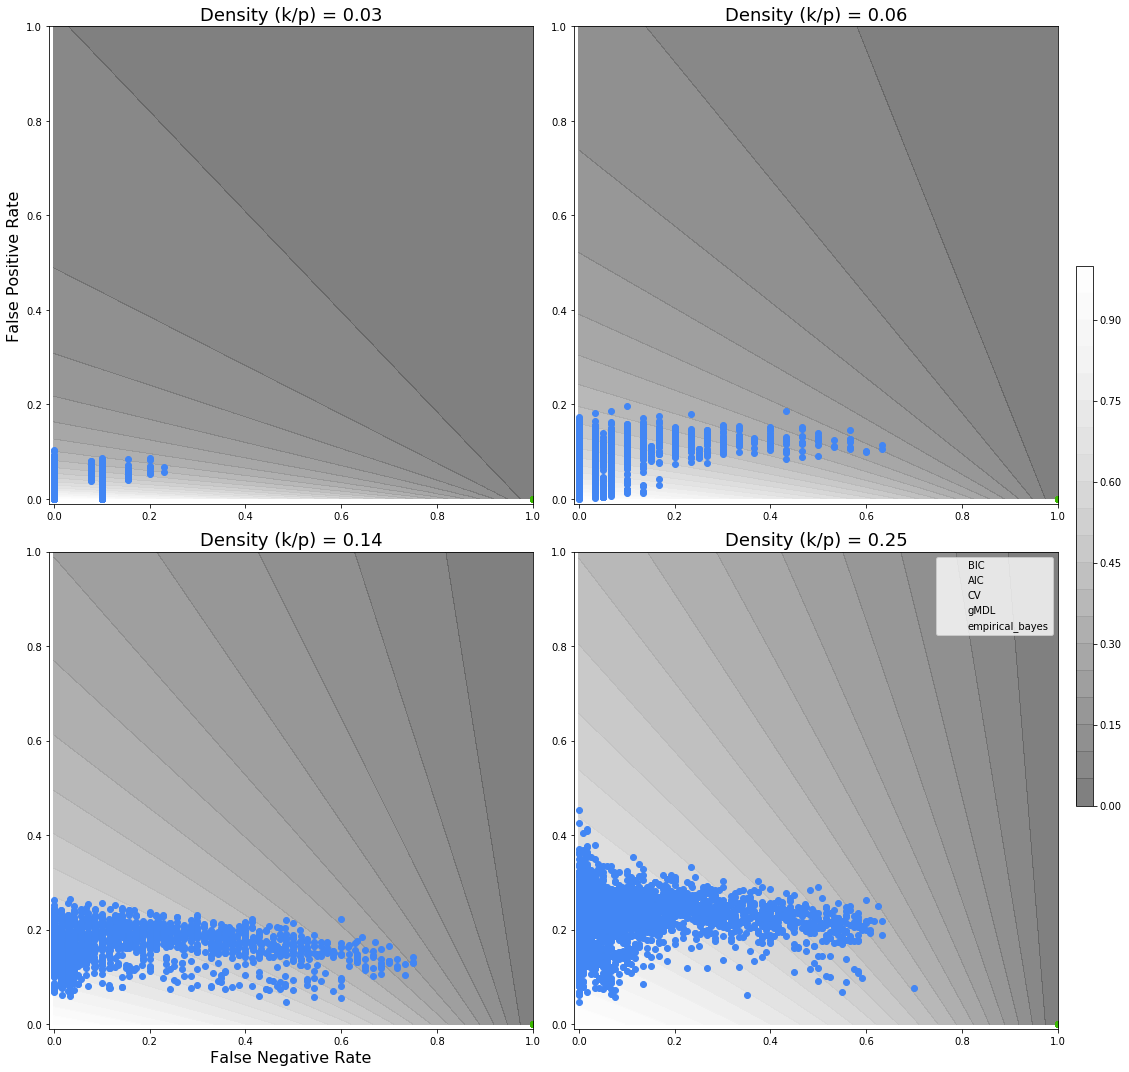

In [13]:
# As a function sparsity, plot the FNR/FPR for different selection methods
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
scatters = []
n_features = 500
sparsity_ = [sparsity[1], sparsity[4], sparsity[7], sparsity[9]]
kappa_ = [5]
# Fix the betawidth, selection method, SNR
#betawidth = np.inf

for i, s in enumerate(sparsity_):
    
    a = ax[np.unravel_index(i, (2, 2))]
    
    # Superimpose contours of constant selection accuracy
    xx = np.linspace(0, 1, 100)
    yy = np.linspace(0, 1, 100)
    z = np.zeros((100, 100))
    for ix, x in enumerate(xx):
        for iy, y in enumerate(yy):
            z[ix, iy] = 1 - ((1 - s)* y + s * x)/(s * (2 - x - y) + y) 
    
    cmap = plt.get_cmap('Greys_r')
    cmap_new = truncate_colormap(cmap, minval = 0.25)
    cs = a.contourf(xx, yy, z.T, 20, cmap = cmap_new, alpha = 0.75)

    # Set opacity via average correlation

    # Blue
    c1 = ['#4286f4', '#99bdf7', '#00aeff']
    # Green
    c2 = ['#3ab700', '#bae288', '#64821d']
    # Red
    c3 = ['#e50b0b', '#ef5f5f', '#70001d']
    # Cyan
    c4 = ['#1ec9be', '#d799ff', '#572677']
    # Orange
    c5 = ['#e38f12']
    
    col = [c1[0], c2[0], c3[0], c4[0], c5[0], c1[2]]
    
    for j, k in enumerate(kappa_):
            lasso1 = apply_df_filters(lasso, sparsity=s, kappa=k, selection_method='BIC')
            lasso2 = apply_df_filters(lasso, sparsity=s, kappa=k, selection_method='AIC')
            lasso3 = apply_df_filters(lasso, sparsity=s, kappa=k, selection_method='CV')
            lasso4 = apply_df_filters(lasso, sparsity=s, kappa=k, selection_method='gMDL')
            lasso5 = apply_df_filters(lasso, sparsity=s, kappa=k, selection_method='empirical_bayes')
#            lasso6 = apply_df_filters(lasso, sparsity=s, kappa=k, selection_method='oracle')
            
#            lasso_ = [lasso1, lasso2, lasso3, lasso4, lasso5, lasso6]
            lasso_ = [lasso4, lasso5]
            for idx, ll in enumerate(lasso_):
                cov_params, rep_idxs = unique_cov_params(ll)
#                avgcov = [calc_avg_cov(500, *cp) for cp in cov_params]
                a.scatter(ll['FNR'].values, ll['FPR'].values, c=col[idx])
    plt.legend(['BIC', 'AIC', 'CV', 'gMDL', 'empirical_bayes'])
    a.set_xlim([-0.01, 1])
    a.set_ylim([-0.01, 1])
    a.set_title('Density (k/p) = %.2f' % s, fontsize = 18)

ax[0, 0].set_ylabel('False Positive Rate', fontsize = 16)
ax[1, 0].set_xlabel('False Negative Rate', fontsize = 16)
cax = fig.add_axes([1, 0.25, 0.015, 0.5])
plt.colorbar(cs, cax = cax)
plt.tight_layout()
# plt.savefig('fprvfnr_BIC.pdf', bbox_inches = 'tight', pad_inches=0)

In [14]:
len(unique_cov_params(lasso))

2

In [15]:
from utils import gen_covariance